In [28]:
from ES import populational_isotropic_ES, populational_non_isotropic_ES, ESAlgorithm
import matplotlib.pyplot as plt
import numpy as np
from py_expression_eval import Parser
parser = Parser()


# ES populacionais
## ES isotrópico

In [29]:
alg = ESAlgorithm()
alg.set_evaluation_expression("(x + 2*y - 7)^2 + (2*x + y - 5)^2")
alg.set_variable_bounds("x", 10, True, -10, True)
alg.set_variable_bounds("y", 10, True, -10, True)

res = alg.populational_isotropic_ES(dimension_gen_interval=(-10, 10),  iter=10, seed=0, num_parents=10, num_offspring=80)

{'dim': {'x': 1.0102283567533068, 'y': 3.0018416684494067}, 'sigma': 0.32612732167104214, 'eval': 0.0006907530581269868}
{'dim': {'x': 0.9769107878871803, 'y': 3.0206817171959925}, 'sigma': 0.2384912246930527, 'eval': 0.000984029269263994}
{'dim': {'x': 0.9488719092416391, 'y': 3.0316001203809493}, 'sigma': 0.5276112950902243, 'eval': 0.005138015780929929}
{'dim': {'x': 0.9855334782441532, 'y': 3.049537458666293}, 'sigma': 0.2432928444704873, 'eval': 0.007583122525932977}
{'dim': {'x': 0.959635684606915, 'y': 3.0638401449441246}, 'sigma': 0.22770930838837455, 'eval': 0.007909300356077089}
{'dim': {'x': 0.9253310107253607, 'y': 3.067576693139876}, 'sigma': 0.13862869791754903, 'eval': 0.010343270072869972}
{'dim': {'x': 1.0801037122636148, 'y': 2.9267357903545896}, 'sigma': 0.551577010514016, 'eval': 0.011971364317636284}
{'dim': {'x': 0.9519336723704033, 'y': 3.085904362124556}, 'sigma': 0.10362139097234199, 'eval': 0.015416798701589447}
{'dim': {'x': 0.9821926163326782, 'y': 3.0720059

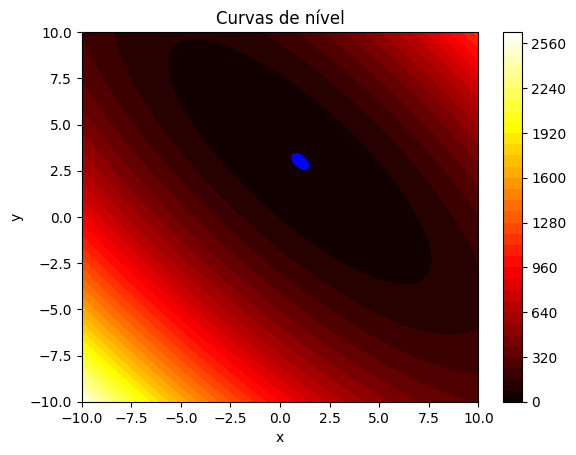

In [30]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]

#plt.plot(x_array, y_array, 'ro', markersize=4)
#plt.axis([-10, 10, -10, 10])
#plt.show()
print('\n'.join([str(d) for d in res]))


@np.vectorize
def f(x,y):
    return parser.parse("(x + 2*y - 7)^2 + (2*x + y - 5)^2").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


In [31]:
alg = ESAlgorithm()
alg.set_evaluation_expression("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))")
alg.set_variable_bounds("x", 10, True, -10, True)
alg.set_variable_bounds("y", 10, True, -10, True)

res = alg.populational_isotropic_ES(dimension_gen_interval=(-10, 10), sigma_var=0.5, iter=10, seed=0, num_parents=100, num_offspring=200)


{'dim': {'x': 8.061932700313214, 'y': -9.660966078794521}, 'sigma': 0.12656201806876688, 'eval': -19.207905141951223}
{'dim': {'x': -8.03917899920286, 'y': -9.662657608977614}, 'sigma': 0.13221619454985994, 'eval': -19.205987839554336}
{'dim': {'x': 8.060623398708879, 'y': -9.64903045715858}, 'sigma': 0.09041635502068877, 'eval': -19.205780224157422}
{'dim': {'x': 8.037410858544895, 'y': -9.665022531865073}, 'sigma': 0.12096249094276793, 'eval': -19.205451494299773}
{'dim': {'x': -8.051078407830634, 'y': 9.64427041452359}, 'sigma': 0.311696648982978, 'eval': -19.204182711131867}
{'dim': {'x': 8.062275561244038, 'y': -9.686525971544835}, 'sigma': 0.14340715581114472, 'eval': -19.203078412924494}
{'dim': {'x': -8.064257967948734, 'y': 9.688227944764638}, 'sigma': 0.19225582844491507, 'eval': -19.201955467617992}
{'dim': {'x': 8.079005247860566, 'y': -9.679686405598911}, 'sigma': 0.1007410096304209, 'eval': -19.200424934308607}
{'dim': {'x': 8.04456306341031, 'y': -9.69669106769313}, 'sig

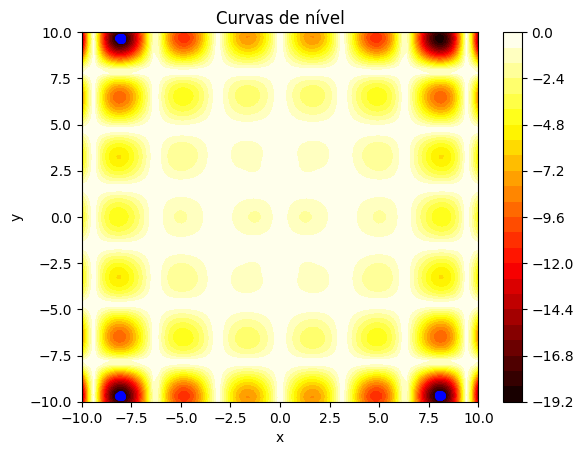

In [32]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]

print('\n'.join([str(d) for d in res]))


@np.vectorize
def f(x,y):
    return parser.parse("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 25, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [33]:
alg = ESAlgorithm()
alg.set_evaluation_expression("100*sqrt(abs(y-0.01*x^2)) + 0.01*abs(x+10)")
alg.set_variable_bounds("x", -5, True, -15, True)
alg.set_variable_bounds("y", 3, True, -3, True)


res = alg.populational_isotropic_ES(dimension_gen_interval=(-15, 15), sigma_var=0.5, iter=10, seed=0, num_parents=100,num_offspring=200)

{'dim': {'y': 2.2499128930074384, 'x': -15}, 'sigma': 0.42236834511178606, 'eval': 0.9833112694146977}
{'dim': {'y': 0.6577950644143662, 'x': -8.11218296223083}, 'sigma': 0.11041532969249034, 'eval': 1.6923766397991846}
{'dim': {'y': 1.9364783020633123, 'x': -13.917013877084065}, 'sigma': 0.17889045436456108, 'eval': 1.9218556839225391}
{'dim': {'y': 0.6471091709250987, 'x': -8.04194346140257}, 'sigma': 0.08341696063685235, 'eval': 1.9705407421791723}
{'dim': {'y': 1.9341734811146587, 'x': -13.9051312213506}, 'sigma': 0.17423631018144387, 'eval': 2.5821562743927218}
{'dim': {'y': 0.2945432820895232, 'x': -5.434003964258299}, 'sigma': 0.21551093182512962, 'eval': 2.7672564518047396}
{'dim': {'y': 0.30872193598561526, 'x': -5.546614683781352}, 'sigma': 0.17585081886943738, 'eval': 3.3195781005367224}
{'dim': {'y': 0.6362436120038246, 'x': -7.9834396505115315}, 'sigma': 0.0974052146076558, 'eval': 3.3510431601939743}
{'dim': {'y': 2.1663221792861034, 'x': -14.722140885641865}, 'sigma': 0.

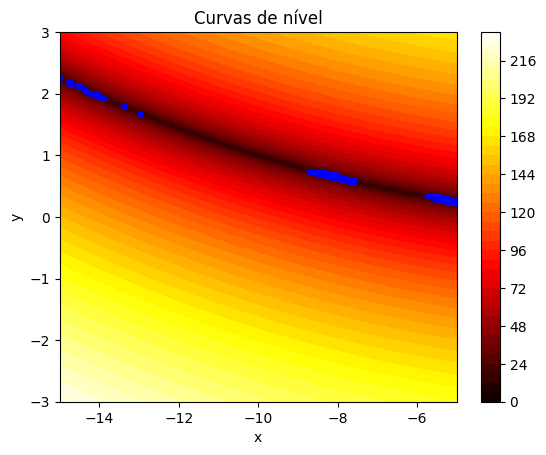

In [34]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]
print('\n'.join([str(d) for d in res]))

@np.vectorize
def f(x,y):
    return parser.parse("100*sqrt(abs(y-0.01*x^2)) + 0.01*abs(x+10)").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-15, -5, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## ES não isotrópico

In [35]:
def allowed_interval(**kwargs):
    if -10 <= kwargs['x'] <= 10 and -10 <= kwargs['y'] <= 10:
        return True
    return False

alg = ESAlgorithm()
alg.set_evaluation_expression("(x + 2*y - 7)^2 + (2*x + y - 5)^2")
alg.set_variable_bounds("x", 10, True, -10, True)
alg.set_variable_bounds("y", 10, True, -10, True)


res = alg.populational_non_isotropic_ES(dimension_gen_interval=(-10, 10), sigma_var=0.5, iter=10,seed=0, num_parents=100, num_offspring=200)

{'dim': {'x': 0.998722488218307, 'y': 3.011712221616498}, 'sigma': {'x': 0.4542108648495033, 'y': 0.022676906056967587}, 'eval': 0.000574340848892627}
{'dim': {'x': 0.9820890219460986, 'y': 3.005593037432878}, 'sigma': {'x': 0.5423480410337378, 'y': 0.035457526321304396}, 'eval': 0.0009590118471451458}
{'dim': {'x': 0.9948870733032387, 'y': 3.018886939350456}, 'sigma': {'x': 0.24579372103994723, 'y': 0.01386187784595936}, 'eval': 0.0011417521957707807}
{'dim': {'x': 0.993173979911781, 'y': 2.9908893537965957}, 'sigma': {'x': 0.3920411858836915, 'y': 0.017289733075713624}, 'eval': 0.0011455077544506261}
{'dim': {'x': 0.9768440093455205, 'y': 3.0265290875919333}, 'sigma': {'x': 0.7812810879166533, 'y': 0.14760613571936865}, 'eval': 0.0012855035234486663}
{'dim': {'x': 0.9649370598885514, 'y': 3.0314811826055115}, 'sigma': {'x': 1.3544661026971725, 'y': 0.5882360375751122}, 'eval': 0.002271790574825963}
{'dim': {'x': 1.0078180133414067, 'y': 2.9719448586421473}, 'sigma': {'x': 0.244246793

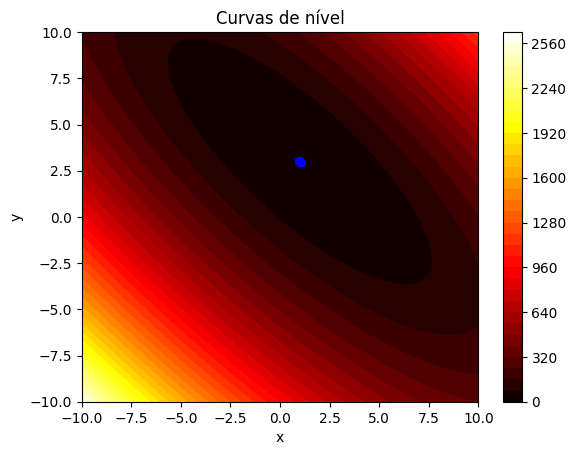

In [36]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]
print('\n'.join([str(d) for d in res]))

@np.vectorize
def f(x,y):
    return parser.parse("(x + 2*y - 7)^2 + (2*x + y - 5)^2").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

#print(x_array)
#print(y_array)

{'dim': {'x': -8.05918849763704, 'y': 9.646028146269927}, 'sigma': {'x': 0.11638952417249775, 'y': 0.22489758280950092}, 'eval': -19.204888065881658}
{'dim': {'x': -8.026150944554304, 'y': 9.661317690358917}, 'sigma': {'x': 0.2932564468036184, 'y': 0.3923174387741512}, 'eval': -19.200186185322853}
{'dim': {'x': -8.03888927108732, 'y': 9.693237889694387}, 'sigma': {'x': 0.21951273880834762, 'y': 0.31191403121261785}, 'eval': -19.197742699561562}
{'dim': {'x': 8.07026143869336, 'y': -9.632264808454934}, 'sigma': {'x': 0.3305660058648348, 'y': 0.19296577691330308}, 'eval': -19.195852745717886}
{'dim': {'x': -8.013736500436814, 'y': 9.656755191222896}, 'sigma': {'x': 0.1609657935560276, 'y': 0.672174884038616}, 'eval': -19.191098885763918}
{'dim': {'x': -8.072639393536377, 'y': -9.626393014799717}, 'sigma': {'x': 0.26730289451799866, 'y': 0.60197139177743}, 'eval': -19.190987669043338}
{'dim': {'x': 8.032267855103163, 'y': -9.703390964804639}, 'sigma': {'x': 2.492349953872259, 'y': 0.14259

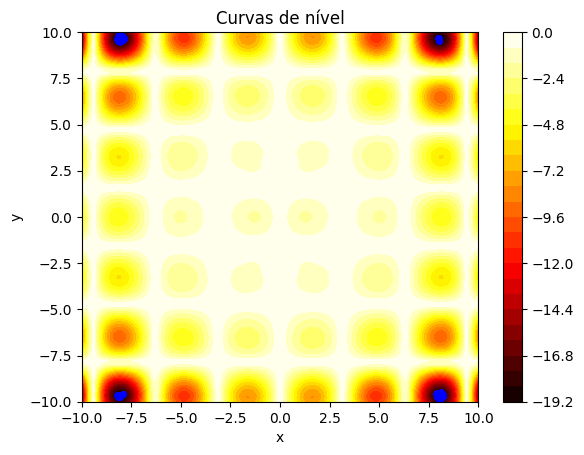

In [37]:
def allowed_interval(**kwargs):
    if -10 <= kwargs['x'] <= 10 and -10 <= kwargs['y'] <= 10:
        return True
    return False

alg = ESAlgorithm()
alg.set_evaluation_expression("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))")
alg.set_variable_bounds("x", 10, True, -10, True)
alg.set_variable_bounds("y", 10, True, -10, True)


res = alg.populational_non_isotropic_ES( dimension_gen_interval=(-10, 10), sigma_var=0.5, iter=10, seed=0, num_parents=100, num_offspring=200)

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]
print('\n'.join([str(d) for d in res]))


@np.vectorize
def f(x,y):
    return parser.parse("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 25, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

#print(x_array)
#print(y_array)

In [38]:
alg = ESAlgorithm()
alg.set_evaluation_expression("100*sqrt(abs(y-0.01*x^2)) + 0.01*abs(x+10)")
alg.set_variable_bounds("x", -5, True, -15, True)
alg.set_variable_bounds("y", 3, True, -3, True)


res = alg.populational_non_isotropic_ES(dimension_gen_interval=(-15, 15), sigma_var=0.5, iter=10, seed=0, num_parents=100,num_offspring=200)

{'dim': {'y': 0.6793175029997303, 'x': -8.244462002171911}, 'sigma': {'y': 0.017464513991444656, 'x': 0.36997790108302897}, 'eval': 2.0025844801036334}
{'dim': {'y': 0.5958584547809647, 'x': -7.712362318706199}, 'sigma': {'y': 0.018765213046121155, 'x': 0.2884480327097985}, 'eval': 3.268071950229327}
{'dim': {'y': 0.5686323796142554, 'x': -7.55103356701936}, 'sigma': {'y': 0.023442061703605188, 'x': 0.34154684058527185}, 'eval': 3.9598418573053684}
{'dim': {'y': 0.25164777867388843, 'x': -5}, 'sigma': {'y': 0.22720774007260036, 'x': 0.3613167072813257}, 'eval': 4.109284018011592}
{'dim': {'y': 0.5712230888382737, 'x': -7.546200387474822}, 'sigma': {'y': 0.01986783978867937, 'x': 0.06233384105213523}, 'eval': 4.233678002138483}
{'dim': {'y': 0.6427789171999776, 'x': -8.004657510885888}, 'sigma': {'y': 0.03100172970493583, 'x': 0.3533099256110695}, 'eval': 4.529386353939877}
{'dim': {'y': 0.6111613589553935, 'x': -7.8333435296486}, 'sigma': {'y': 0.024550932469682575, 'x': 0.076176381141

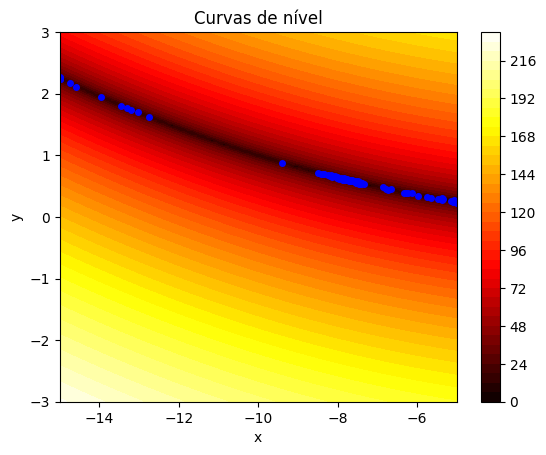

In [39]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]
print('\n'.join([str(d) for d in res]))

@np.vectorize
def f(x,y):
    return parser.parse("100*sqrt(abs(y-0.01*x^2)) + 0.01*abs(x+10)").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-15, -5, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
